In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [1]:
import os
os.getcwd()

'c:\\Users\\91876\\New folder'

In [4]:
df = pd.read_csv('salary_data.csv')
df

,YearsExperience,Salary,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,Date,STATUS,QTR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,1.1,39343.0,10107.0,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,1.3,46205.0,10121.0,34.0,81.35,5.0,2765.90,05-07-2003 00:00,Shipped,2.0,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,1.5,37731.0,10134.0,41.0,94.74,2.0,3884.34,07-01-2003 00:00,Shipped,3.0,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,2.0,43525.0,10145.0,45.0,83.26,6.0,3746.70,8/25/2003 0:00,Shipped,3.0,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,2.2,39891.0,10159.0,49.0,100.00,14.0,5205.27,10-10-2003 00:00,Shipped,4.0,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,2.9,56642.0,10168.0,36.0,96.66,1.0,3479.76,10/28/2003 0:00,Shipped,4.0,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,3.0,60150.0,10180.0,29.0,86.13,9.0,2497.77,11-11-2003 00:00,Shipped,4.0,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,3.2,54445.0,10188.0,48.0,100.00,1.0,5512.32,11/18/2003 0:00,Shipped,4.0,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,3.2,64445.0,10201.0,22.0,98.57,2.0,2168.54,12-01-2003 00:00,Shipped,4.0,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,3.7,57189.0,10211.0,41.0,100.00,14.0,4708.44,1/15/2004 0:00,Shipped,1.0,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [5]:
df.head()

,YearsExperience,Salary,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,Date,STATUS,QTR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,1.1,39343.0,10107.0,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,1.3,46205.0,10121.0,34.0,81.35,5.0,2765.90,05-07-2003 00:00,Shipped,2.0,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,1.5,37731.0,10134.0,41.0,94.74,2.0,3884.34,07-01-2003 00:00,Shipped,3.0,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,2.0,43525.0,10145.0,45.0,83.26,6.0,3746.70,8/25/2003 0:00,Shipped,3.0,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,2.2,39891.0,10159.0,49.0,100.00,14.0,5205.27,10-10-2003 00:00,Shipped,4.0,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YearsExperience   17 non-null     float64
 1   Salary            18 non-null     float64
 2   ORDERNUMBER       18 non-null     float64
 3   QUANTITYORDERED   18 non-null     float64
 4   PRICEEACH         18 non-null     float64
 5   ORDERLINENUMBER   18 non-null     float64
 6   SALES             18 non-null     float64
 7   Date              18 non-null     object 
 8   STATUS            18 non-null     object 
 9   QTR_ID            18 non-null     float64
 10  MONTH_ID          18 non-null     float64
 11  YEAR_ID           18 non-null     float64
 12  PRODUCTLINE       18 non-null     object 
 13  MSRP              18 non-null     float64
 14  PRODUCTCODE       18 non-null     object 
 15  CUSTOMERNAME      18 non-null     object 
 16  PHONE             18 non-null     object 
 17 

In [7]:
df.isnull().sum()

YearsExperience      8
Salary               7
ORDERNUMBER          7
QUANTITYORDERED      7
PRICEEACH            7
ORDERLINENUMBER      7
SALES                7
Date                 7
STATUS               7
QTR_ID               7
MONTH_ID             7
YEAR_ID              7
PRODUCTLINE          7
MSRP                 7
PRODUCTCODE          7
CUSTOMERNAME         7
PHONE                7
ADDRESSLINE1         7
ADDRESSLINE2        23
CITY                 7
STATE               15
POSTALCODE           9
COUNTRY              7
TERRITORY           16
CONTACTLASTNAME      7
CONTACTFIRSTNAME     7
DEALSIZE             7
dtype: int64

<Axes: >

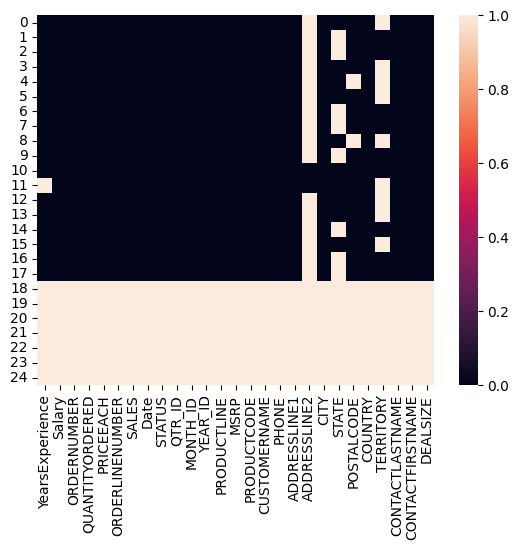

In [8]:
plt.Figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [9]:
x=df.drop('SALES',axis=1)
y=df['SALES']
y

print('Shapes of x=' ,x.shape)
print('Shape of y=' ,y.shape)

Shapes of x= (25, 26)
Shape of y= (25,)


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=51)

print('shape of X_train=', x_train.shape)
print('shape of y_train=', y_train.shape)
print('shape of X_test=', x_test.shape)
print('shape of y_test=', y_test.shape)

shape of X_train= (20, 26)
shape of y_train= (20,)
shape of X_test= (5, 26)
shape of y_test= (5,)


In [11]:
y_test

7     5512.32
10    3965.66
23        NaN
8     2168.54
20        NaN
Name: SALES, dtype: float64

In [12]:
x_test

,YearsExperience,Salary,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,Date,STATUS,QTR_ID,MONTH_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
7,3.2,54445.0,10188.0,48.0,100.00,1.0,11/18/2003 0:00,Shipped,4.0,11.0,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
10,3.9,63218.0,10223.0,37.0,100.00,1.0,2/20/2004 0:00,Shipped,1.0,2.0,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3.2,64445.0,10201.0,22.0,98.57,2.0,12-01-2003 00:00,Shipped,4.0,12.0,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
x = df.iloc[:,:-1].values
y=df.iloc[:,:1].values
x

array([[1.1, 39343.0, 10107.0, 30.0, 95.7, 2.0, 2871.0, '2/24/2003 0:00',
        'Shipped', 1.0, 2.0, 2003.0, 'Motorcycles', 95.0, 'S10_1678',
        'Land of Toys Inc.', '2125557818', '897 Long Airport Avenue',
        nan, 'NYC', 'NY', '10022', 'USA', nan, 'Yu', 'Kwai'],
       [1.3, 46205.0, 10121.0, 34.0, 81.35, 5.0, 2765.9,
        '05-07-2003 00:00', 'Shipped', 2.0, 5.0, 2003.0, 'Motorcycles',
        95.0, 'S10_1678', 'Reims Collectables', '26.47.1555',
        "59 rue de l'Abbaye", nan, 'Reims', nan, '51100', 'France',
        'EMEA', 'Henriot', 'Paul'],
       [1.5, 37731.0, 10134.0, 41.0, 94.74, 2.0, 3884.34,
        '07-01-2003 00:00', 'Shipped', 3.0, 7.0, 2003.0, 'Motorcycles',
        95.0, 'S10_1678', 'Lyon Souveniers', '+33 1 46 62 7555',
        '27 rue du Colonel Pierre Avia', nan, 'Paris', nan, '75508',
        'France', 'EMEA', 'Da Cunha', 'Daniel'],
       [2.0, 43525.0, 10145.0, 45.0, 83.26, 6.0, 3746.7,
        '8/25/2003 0:00', 'Shipped', 3.0, 8.0, 2003.0, 'Mot

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=1/3,random_state=0)

x_test.shape

(9, 26)

   YearsExperience   Salary  ORDERNUMBER  QUANTITYORDERED  PRICEEACH  \
0              1.1  39343.0      10107.0             30.0      95.70   
1              1.3  46205.0      10121.0             34.0      81.35   
2              1.5  37731.0      10134.0             41.0      94.74   
3              2.0  43525.0      10145.0             45.0      83.26   
4              2.2  39891.0      10159.0             49.0     100.00   

   ORDERLINENUMBER    SALES              Date   STATUS  QTR_ID  ...  \
0              2.0  2871.00    2/24/2003 0:00  Shipped     1.0  ...   
1              5.0  2765.90  05-07-2003 00:00  Shipped     2.0  ...   
2              2.0  3884.34  07-01-2003 00:00  Shipped     3.0  ...   
3              6.0  3746.70    8/25/2003 0:00  Shipped     3.0  ...   
4             14.0  5205.27  10-10-2003 00:00  Shipped     4.0  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY  STATE  \
0        897 Long Airport Avenue           NaN            NYC     NY

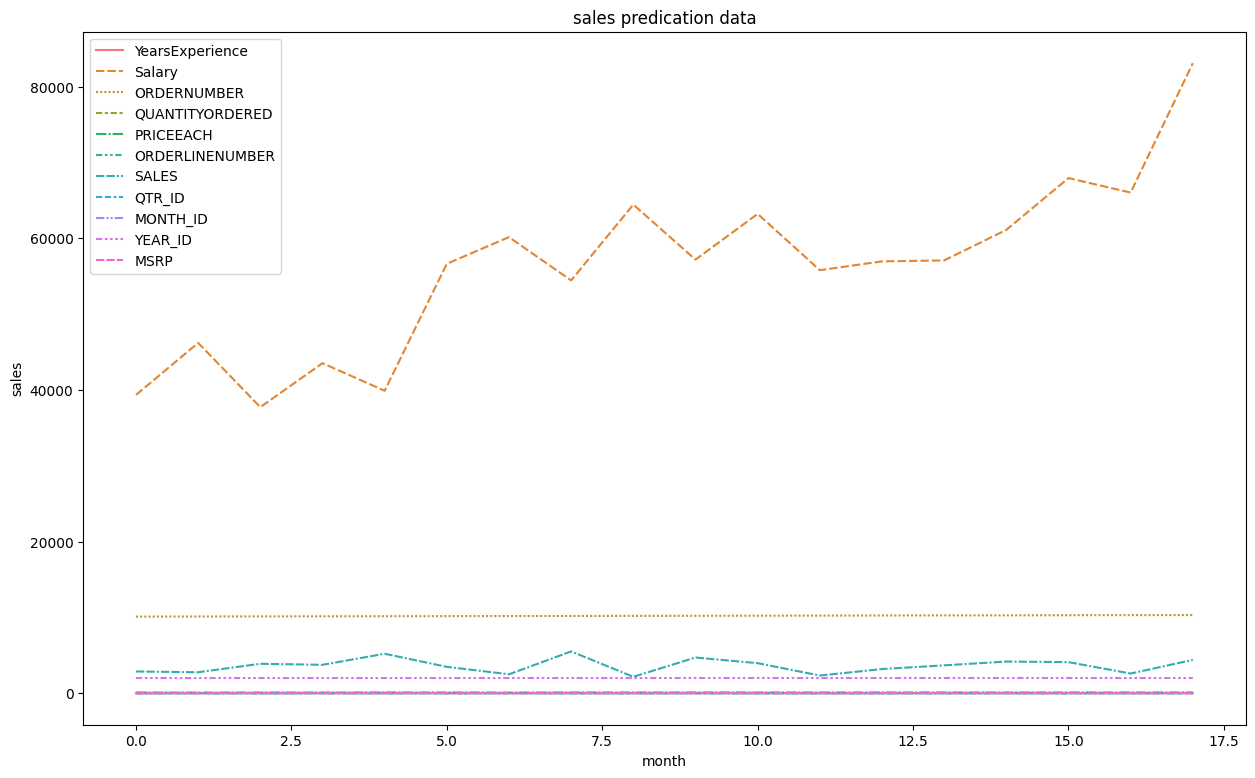

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'salary_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())

# Create a plot
plt.figure(figsize=(15, 9))
sns.lineplot(data=data)

# Customize the plot (optional)
plt.title('sales predication data')
plt.xlabel('month')
plt.ylabel('sales')

# Show the plot
plt.show()


In [31]:
import pandas as pd

# Load the CSV file
file_path = 'salary_data.csv'
data = pd.read_csv(file_path)

# Display the data
data.head()



,YearsExperience,Salary,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,Date,STATUS,QTR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,1.1,39343.0,10107.0,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,1.3,46205.0,10121.0,34.0,81.35,5.0,2765.90,05-07-2003 00:00,Shipped,2.0,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,1.5,37731.0,10134.0,41.0,94.74,2.0,3884.34,07-01-2003 00:00,Shipped,3.0,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,2.0,43525.0,10145.0,45.0,83.26,6.0,3746.70,8/25/2003 0:00,Shipped,3.0,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,2.2,39891.0,10159.0,49.0,100.00,14.0,5205.27,10-10-2003 00:00,Shipped,4.0,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


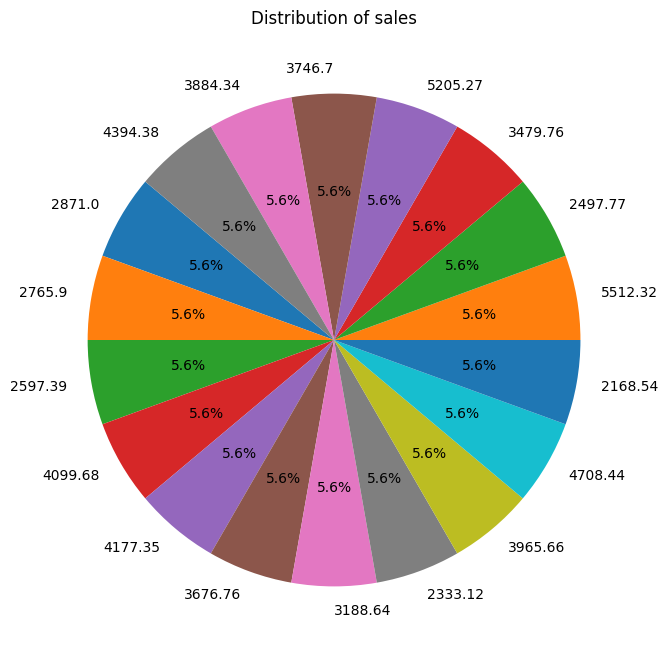

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'salary_data.csv'
data = pd.read_csv(file_path)

# Data for the pie chart
deal_size_counts = data['SALES'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(deal_size_counts, labels=deal_size_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of sales')
plt.show()


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

# Load the CSV file
file_path = 'salary_data.csv'  # Update the path accordingly
data = pd.read_csv(file_path)

# Extracting the independent variable (YearsExperience) and the dependent variable (Salary)
X = data[['YearsExperience']]
y = data['Salary']

# Transforming the data to include polynomial features
poly = PolynomialFeatures(degree=3)  # Change the degree as needed
X_poly = poly. fit_transform(X)

# Fitting the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Making predictions
y_pred = model.predict(X_poly)

# Plotting the results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Polynomial fit')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

# Evaluating the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


ValueError: Input X contains NaN.
PolynomialFeatures does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values